## Part 1 : Data preparation and customer analytics
We need to present a strategic recommendation to Julia that is supported by data which she can then use for the upcoming category review however to do so we need to analyse the data to understand the current purchasing trends and behaviours. The client is particularly interested in customer segments and their chip purchasing behaviour. Consider what metrics would help describe the customers’ purchasing behaviour.  

For part 1, there are things that I have to do in order to complete the task:
1. Checking data formats and correcting (if applicable)
2. Derive extra features such as pack size and brand name from the data and define metrics of interest
3. Finding outliers and removing these (if applicable)
4. Creating and interpreting high level summaries of the data

In [150]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
# Loading the data sets
transaction = pd.read_excel("QVI_transaction_data.xlsx")
behaviour = pd.read_csv("QVI_purchase_behaviour.csv")

In [152]:
# View the transaction data
transaction.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [153]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [154]:
transaction.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [155]:
# View the behaviour data
behaviour.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [156]:
behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [157]:
behaviour.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


### 1. Checking data formats and correcting (if applicable)

The 'date' column is not in datetime format. Instead it is in integer. So I'm going to change this into a datetime format.


In [158]:
# Change into datetime
transaction['DATE'] = pd.to_datetime(transaction['DATE'], errors='coerce',unit='d',origin='1900-01-01')

Checking if Store Numbers, Product numbers and Loyalty Card Numbers are labels since they identify the unique customers, products and stores.
Checking the summary of data. Checking for null values, data types etc.

In [159]:
# Change type for STORE_NBR, LYLTY_CARD_NBR, PROD_NBR, TXN_ID
transaction['STORE_NBR'] = transaction['STORE_NBR'].astype('object')
transaction['LYLTY_CARD_NBR'] = transaction['LYLTY_CARD_NBR'].astype('object')
transaction['PROD_NBR'] = transaction['PROD_NBR'].astype('object')
transaction['TXN_ID'] = transaction['TXN_ID'].astype('object')

transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  object        
 2   LYLTY_CARD_NBR  264836 non-null  object        
 3   TXN_ID          264836 non-null  object        
 4   PROD_NBR        264836 non-null  object        
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 16.2+ MB


It looks like there is no missing values from the data set. However, I see that there might be an outliers from the max and min values. I'm going to analyze the data based on product name and see if the outlier still exists. First, I'm going to separate the product name into three different columns: brand name, the weight of the product, and the description of the product.

### 2. Derive extra features such as pack size and brand name from the data and define metrics of interest

Creating columns for transaction table based on product name. These columns will separate product name into three different columns: Brand name, pkg weight, and product description.

In [160]:
# Extracting the first name from PROD_NAME which I rename as BRAND_NAME
transaction['BRAND_NAME'] = transaction['PROD_NAME'].apply(lambda x: x.split(" ")[0])

# Extracting the last word from PROD_NAME which I rename as WEIGHT
transaction['WEIGHT'] = transaction['PROD_NAME'].apply(lambda x: x.split(" ")[-1])

# Removing the first word and last word from PROD_NAME to get PROD_DESC
transaction['PROD_DESC'] = transaction['PROD_NAME'].str.split(n=1).str[1]
transaction['PROD_DESC']=transaction['PROD_DESC'].str.rsplit(' ',1).str[0]

/var/folders/yl/6k3rgrlj4v3_4c08hxtvphxh0000gn/T/ipykernel_23373/990805979.py:9: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  transaction['PROD_DESC']=transaction['PROD_DESC'].str.rsplit(' ',1).str[0]


In [161]:
transaction.head(10)
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  object        
 2   LYLTY_CARD_NBR  264836 non-null  object        
 3   TXN_ID          264836 non-null  object        
 4   PROD_NBR        264836 non-null  object        
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
 8   BRAND_NAME      264836 non-null  object        
 9   WEIGHT          264836 non-null  object        
 10  PROD_DESC       264836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 22.2+ MB


Looking at the value counts of WEIGHT to see if there is multiple data with mix product desc and weight

In [162]:
transaction.WEIGHT.value_counts()

175g                  60561
150g                  41633
134g                  25102
110g                  22387
170g                  18502
165g                  15297
330g                  12540
300g                  12041
380g                   6418
200g                   4473
Salt                   3257
Chicken270g            3170
250g                   3169
210g                   3167
Ht300g                 3125
270g                   3115
210G                   3105
90g                    3008
190g                   2995
160g                   2970
220g                   1564
70g                    1507
150G                   1498
Chs&Onion170g          1481
SeaSalt175g            1468
180g                   1468
Chli&S/Cream175G       1461
Chckn175g              1460
125g                   1454
CutSalt/Vinegr175g     1440
Name: WEIGHT, dtype: int64

In [163]:
# Fixing the name mix and extracting only numeric characters
transaction['WEIGHT']= transaction.WEIGHT.str.extract('(\d+)')
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,WEIGHT,PROD_DESC
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175,Chip Compny
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175,Nacho Cheese
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170,Crinkle Cut Chips Chicken
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175,Chip Thinly S/Cream&Onion
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150,Tortilla ChpsHny&Jlpno Chili
...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-11,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle,175,Sweet Chilli And Sour Cream
264832,2018-08-15,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos,175,Splash Of Lime
264833,2018-11-08,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos,170,Mexicana
264834,2018-12-29,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos,150,Corn Chip Mexican Jalapeno


The Transaction data look good. From the 'view' of behavior data above, it also looks like the data does not have any missing value. This is good. So, I will move on to the next step, performing left join the transaction table with the behavior table to add life stage and premium details. Oh, before that, let's make sure that there are no duplicates in both data.

In [164]:
# Checking for duplicates in transaction data
len(transaction) - len(transaction.drop_duplicates())

1

In [165]:
# Checking for duplicates in behaviour data
len(behaviour) - len(behaviour.drop_duplicates())

0

Okay, so there is one duplicate in the transaction data. I'm going to drop this duplicate. Because we already separate PROD_NAME into three categories, there is no point of keeping the column anymore. So, I'm going to drop the entire column.

In [166]:
transaction.drop_duplicates()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,WEIGHT,PROD_DESC
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175,Chip Compny
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175,Nacho Cheese
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170,Crinkle Cut Chips Chicken
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175,Chip Thinly S/Cream&Onion
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150,Tortilla ChpsHny&Jlpno Chili
...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-11,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle,175,Sweet Chilli And Sour Cream
264832,2018-08-15,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos,175,Splash Of Lime
264833,2018-11-08,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos,170,Mexicana
264834,2018-12-29,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos,150,Corn Chip Mexican Jalapeno


In [167]:
transaction.drop(columns='PROD_NAME', axis=1, inplace=True)
transaction.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  object        
 2   LYLTY_CARD_NBR  264836 non-null  object        
 3   TXN_ID          264836 non-null  object        
 4   PROD_NBR        264836 non-null  object        
 5   PROD_QTY        264836 non-null  int64         
 6   TOT_SALES       264836 non-null  float64       
 7   BRAND_NAME      264836 non-null  object        
 8   WEIGHT          261579 non-null  object        
 9   PROD_DESC       264836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 20.2+ MB


There are no empty values and there are no duplicates. Now, we can merge the data.


In [168]:
merged = transaction.merge(right = behaviour, how ='outer', left_on = 'LYLTY_CARD_NBR', right_on= 'LYLTY_CARD_NBR')
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264836 non-null  datetime64[ns]
 1   STORE_NBR         264836 non-null  object        
 2   LYLTY_CARD_NBR    264836 non-null  object        
 3   TXN_ID            264836 non-null  object        
 4   PROD_NBR          264836 non-null  object        
 5   PROD_QTY          264836 non-null  int64         
 6   TOT_SALES         264836 non-null  float64       
 7   BRAND_NAME        264836 non-null  object        
 8   WEIGHT            261579 non-null  object        
 9   PROD_DESC         264836 non-null  object        
 10  LIFESTAGE         264836 non-null  object        
 11  PREMIUM_CUSTOMER  264836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 26.3+ MB


In [169]:
merged.describe()

,PROD_QTY,TOT_SALES
count,264836.000000,264836.000000
mean,1.907309,7.304200
std,0.643654,3.083226
min,1.000000,1.500000
25%,2.000000,5.400000
50%,2.000000,7.400000
75%,2.000000,9.200000
max,200.000000,650.000000


Based on this observation, the outlier still exists. 3rd quartile value to the maximum value difference is too high for both production and total sales.  Further investigation on this is needed before the removal.




### 3. Finding outliers and removing these (if applicable)

In [170]:
merged[merged['TOT_SALES']== 650]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,BRAND_NAME,WEIGHT,PROD_DESC,LIFESTAGE,PREMIUM_CUSTOMER
71456,2018-08-21,226,226000,226201,4,200,650.0,Dorito,380,Corn Chp Supreme,OLDER FAMILIES,Premium
71457,2019-05-22,226,226000,226210,4,200,650.0,Dorito,380,Corn Chp Supreme,OLDER FAMILIES,Premium


Looks like there are 2 data points with PROD_QTY 200 and TOT_SALES 650, and both belongs to the same customer Loyalty card number 226000. Lets do a check on the card holder to cross check if they do have other purchases.

In [171]:
merged[merged['LYLTY_CARD_NBR']== 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,BRAND_NAME,WEIGHT,PROD_DESC,LIFESTAGE,PREMIUM_CUSTOMER
71456,2018-08-21,226,226000,226201,4,200,650.0,Dorito,380,Corn Chp Supreme,OLDER FAMILIES,Premium
71457,2019-05-22,226,226000,226210,4,200,650.0,Dorito,380,Corn Chp Supreme,OLDER FAMILIES,Premium


This confirms that the particular customer could be a bulk buyer and hence we could consider this as an outlier and remove it.

In [172]:
# Removing outliers and checking if outliers still exist
merged2 = merged[merged['LYLTY_CARD_NBR']!= 226000]
merged2.describe()

,PROD_QTY,TOT_SALES
count,264834.000000,264834.000000
mean,1.905813,7.299346
std,0.343436,2.527241
min,1.000000,1.500000
25%,2.000000,5.400000
50%,2.000000,7.400000
75%,2.000000,9.200000
max,5.000000,29.500000


It looks like I cleaned the data, merged them into one dataset, and removed any outliers. So, I think the data is ready for some visualizations.

### 4. Creating and interpreting high level summaries of the data


In [173]:
from collections import Counter
Counter(" ".join(merged2['BRAND_NAME']).split()).most_common(50)

[('Kettle', 41288),
 ('Smiths', 28860),
 ('Pringles', 25102),
 ('Doritos', 24962),
 ('Thins', 14075),
 ('RRD', 11894),
 ('Infuzions', 11057),
 ('WW', 10320),
 ('Cobs', 9693),
 ('Tostitos', 9471),
 ('Twisties', 9454),
 ('Old', 9324),
 ('Tyrrells', 6442),
 ('Grain', 6272),
 ('Natural', 6050),
 ('Red', 5885),
 ('Cheezels', 4603),
 ('CCs', 4551),
 ('Woolworths', 4437),
 ('Dorito', 3183),
 ('Infzns', 3144),
 ('Smith', 2963),
 ('Cheetos', 2927),
 ('Snbts', 1576),
 ('Burger', 1564),
 ('GrnWves', 1468),
 ('Sunbites', 1432),
 ('NCC', 1419),
 ('French', 1418)]

There are various Brand names here that are duplicated , for example RRD is same as RED, SNBTS is SUNBITE etc. Next, I'm going to need to replace them.

In [174]:
merged2['BRAND_NAME'] = merged2['BRAND_NAME'].replace('Red','RRD')
merged2['BRAND_NAME'] = merged2['BRAND_NAME'].replace('Snbts','Sunbites')
merged2['BRAND_NAME'] = merged2['BRAND_NAME'].replace('Dorito','Doritos')
merged2['BRAND_NAME'] = merged2['BRAND_NAME'].replace('Grain','GrnWves')
merged2['BRAND_NAME'] = merged2['BRAND_NAME'].replace('Infzns','Infuzions')
merged2['BRAND_NAME'] = merged2['BRAND_NAME'].replace('WW','Woolworths')
merged2['BRAND_NAME'] = merged2['BRAND_NAME'].replace('Smith','Smiths')
merged2['BRAND_NAME'] = merged2['BRAND_NAME'].replace('NCC','Natural')

/var/folders/yl/6k3rgrlj4v3_4c08hxtvphxh0000gn/T/ipykernel_23373/1413757396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged2['BRAND_NAME'] = merged2['BRAND_NAME'].replace('Red','RRD')
/var/folders/yl/6k3rgrlj4v3_4c08hxtvphxh0000gn/T/ipykernel_23373/1413757396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged2['BRAND_NAME'] = merged2['BRAND_NAME'].replace('Snbts','Sunbites')
/var/folders/yl/6k3rgrlj4v3_4c08hxtvphxh0000gn/T/ipykernel_23373/1413757396.py:3: SettingWithCopyWarning: 
A value 

In [175]:
merged2.BRAND_NAME.value_counts()

Kettle        41288
Smiths        31823
Doritos       28145
Pringles      25102
RRD           17779
Woolworths    14757
Infuzions     14201
Thins         14075
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
GrnWves        7740
Natural        7469
Tyrrells       6442
Cheezels       4603
CCs            4551
Sunbites       3008
Cheetos        2927
Burger         1564
French         1418
Name: BRAND_NAME, dtype: int64

<AxesSubplot: >

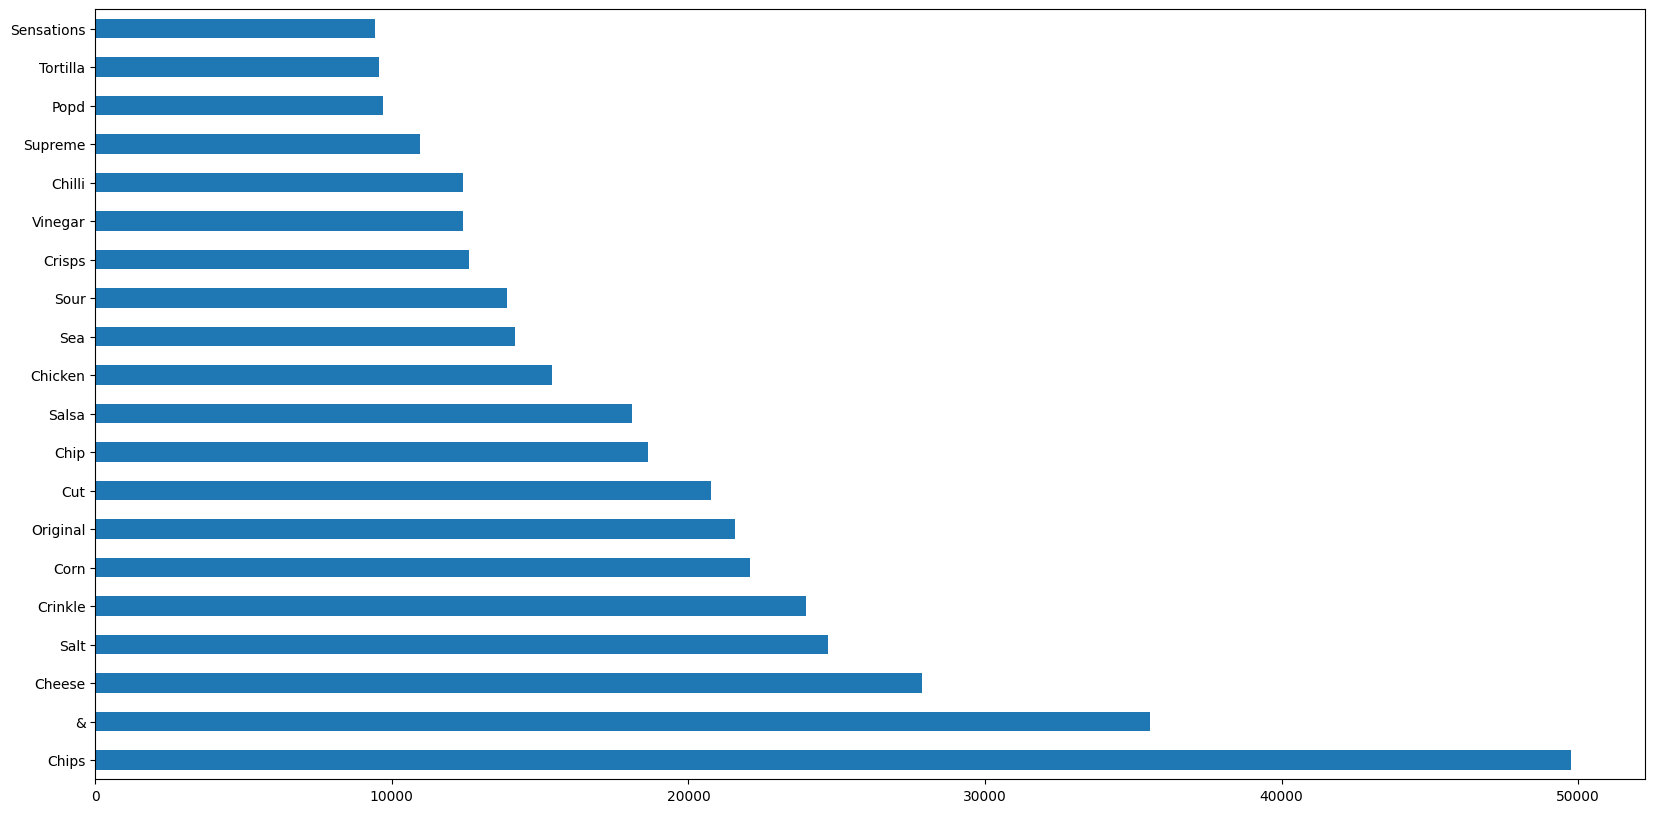

In [176]:
# Top 20 flavour that people would buy
merged2.PROD_DESC.str.split(expand=True).stack().value_counts()[:20].plot(kind='barh', figsize=(20,10))

Flavourings such as cheese, salt, crinkle, corn, chicken etc seem to be the most common descriptions among chips. A mix of these flavours could be the most sought out among the chips section. This needs further investigation.

<AxesSubplot: >

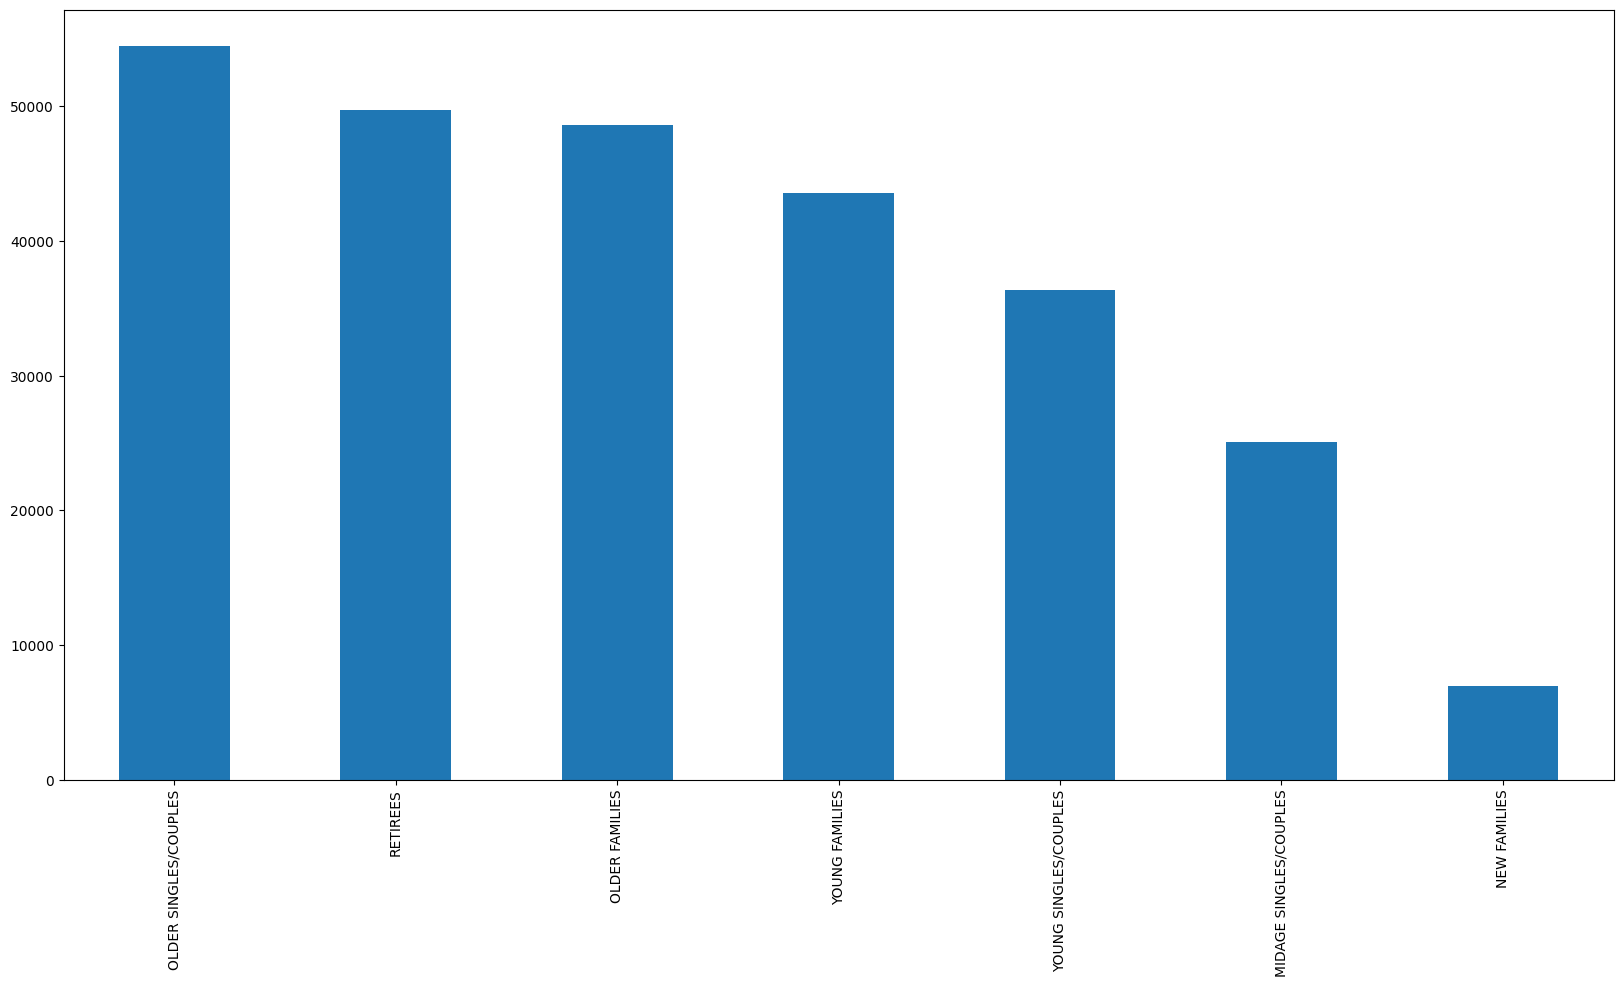

In [177]:
# Group that do most of purchases
merged2.LIFESTAGE.value_counts().plot(kind='bar',figsize=(20,10))

From the bar plot, it looks like older singles/couples seems to do the most of purchases and the least purchase comes from new families.

<AxesSubplot: >

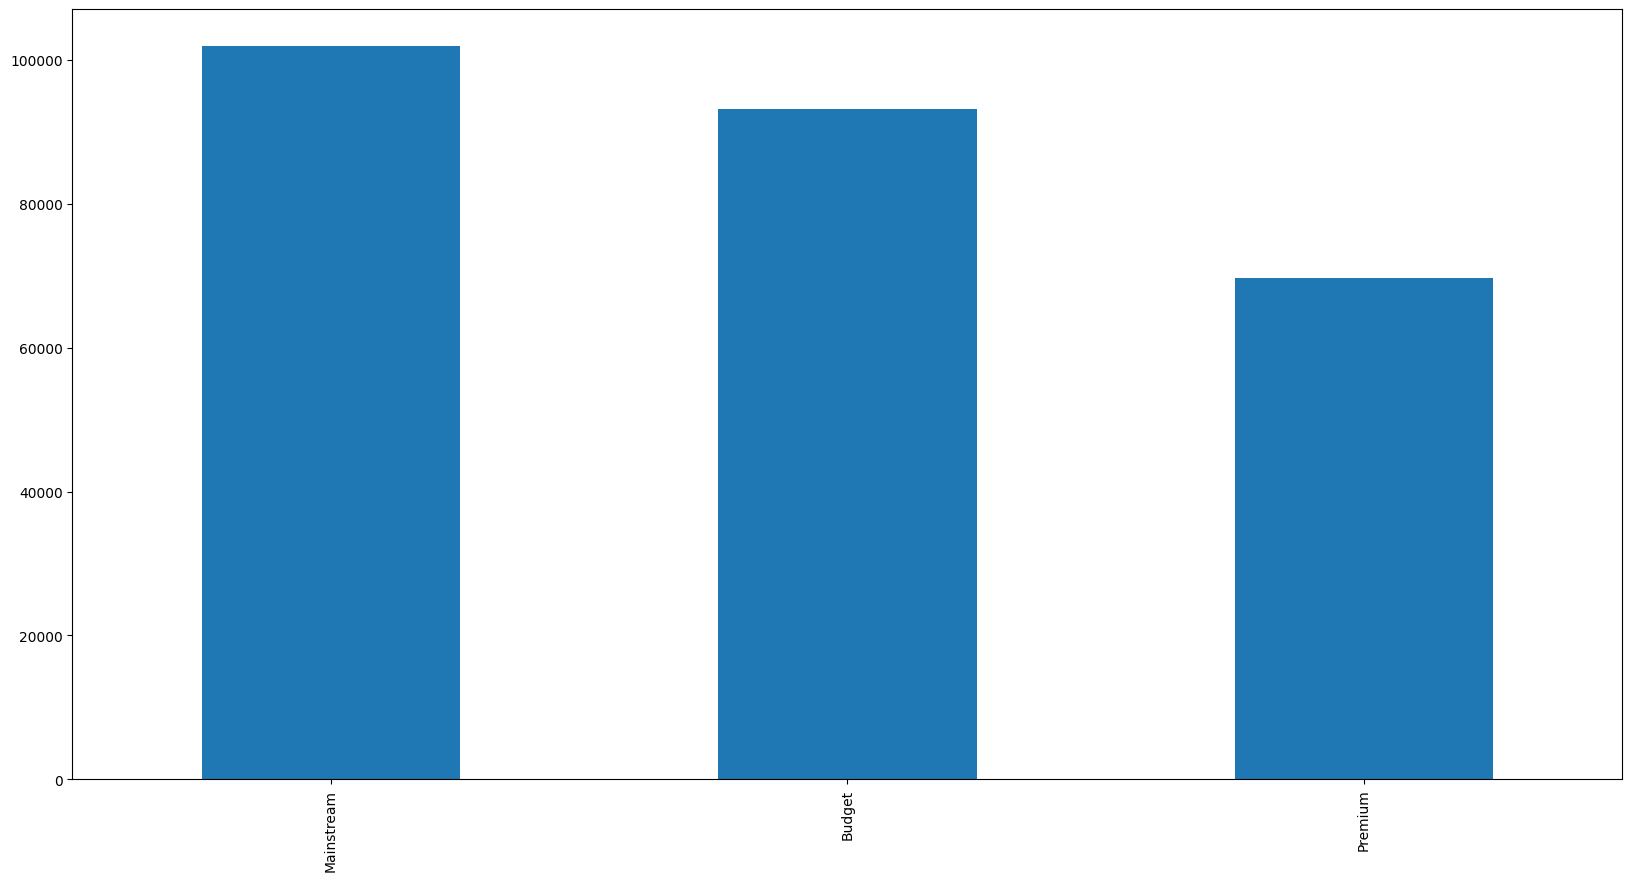

In [178]:
# Top buying performer
merged2.PREMIUM_CUSTOMER.value_counts().plot(kind='bar',figsize=(20,10))

Mainstream membership seems to be the top buying performer followed by budget and premium customers.

<AxesSubplot: >

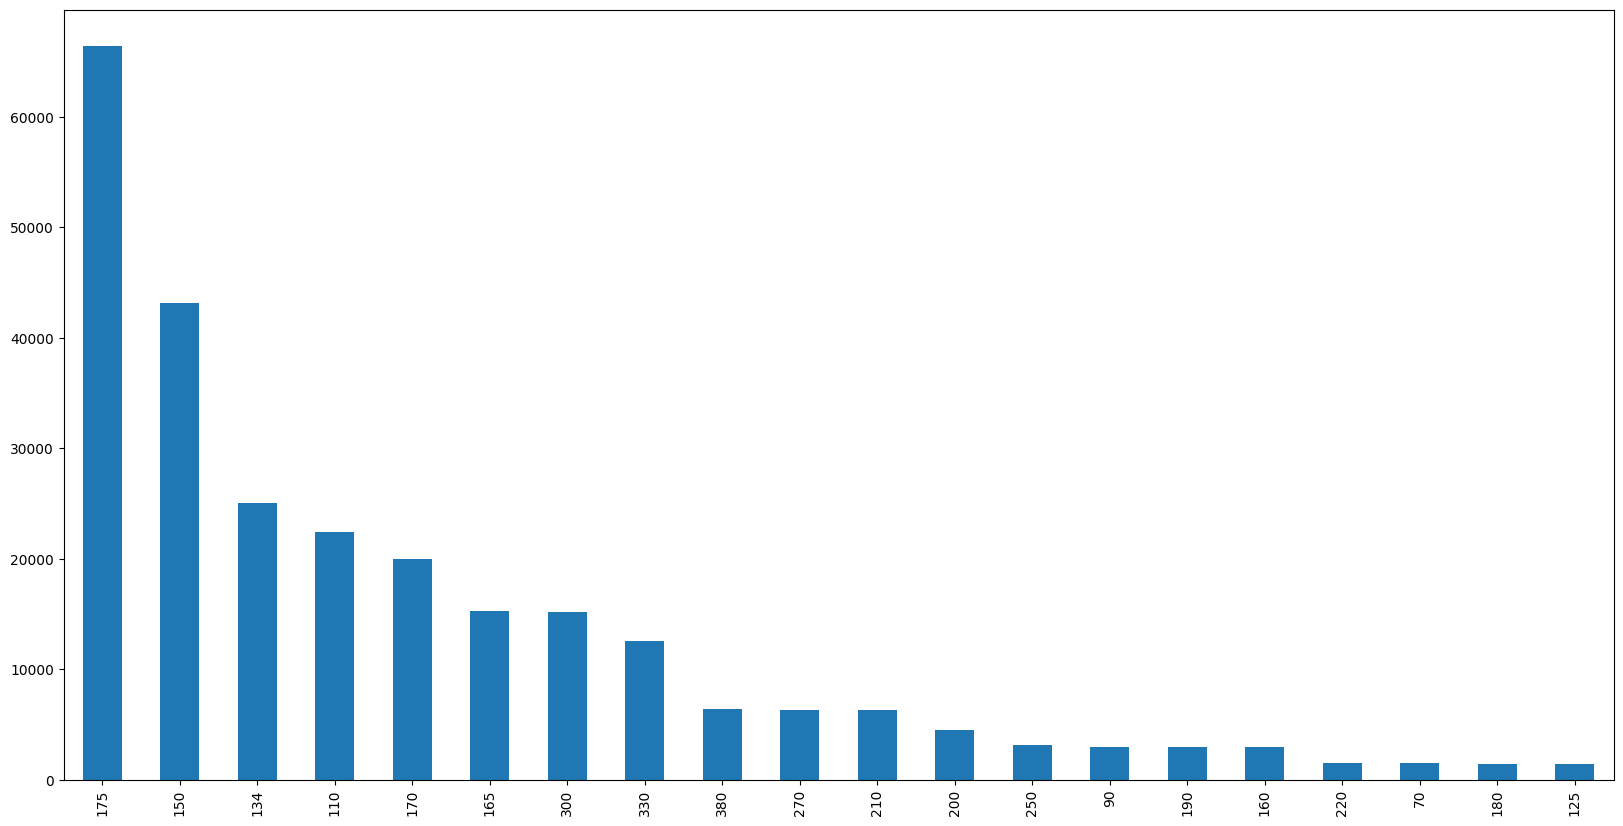

In [179]:
# Most sold chips by weight
merged2.WEIGHT.value_counts().plot(kind='bar',figsize=(20,10))

By dimensions 175gms seems to be in top followed 150,134,170 and 165 in order as the top 5 performers.

125,180,70,220,160 gms seems to be in least purchased frequency.

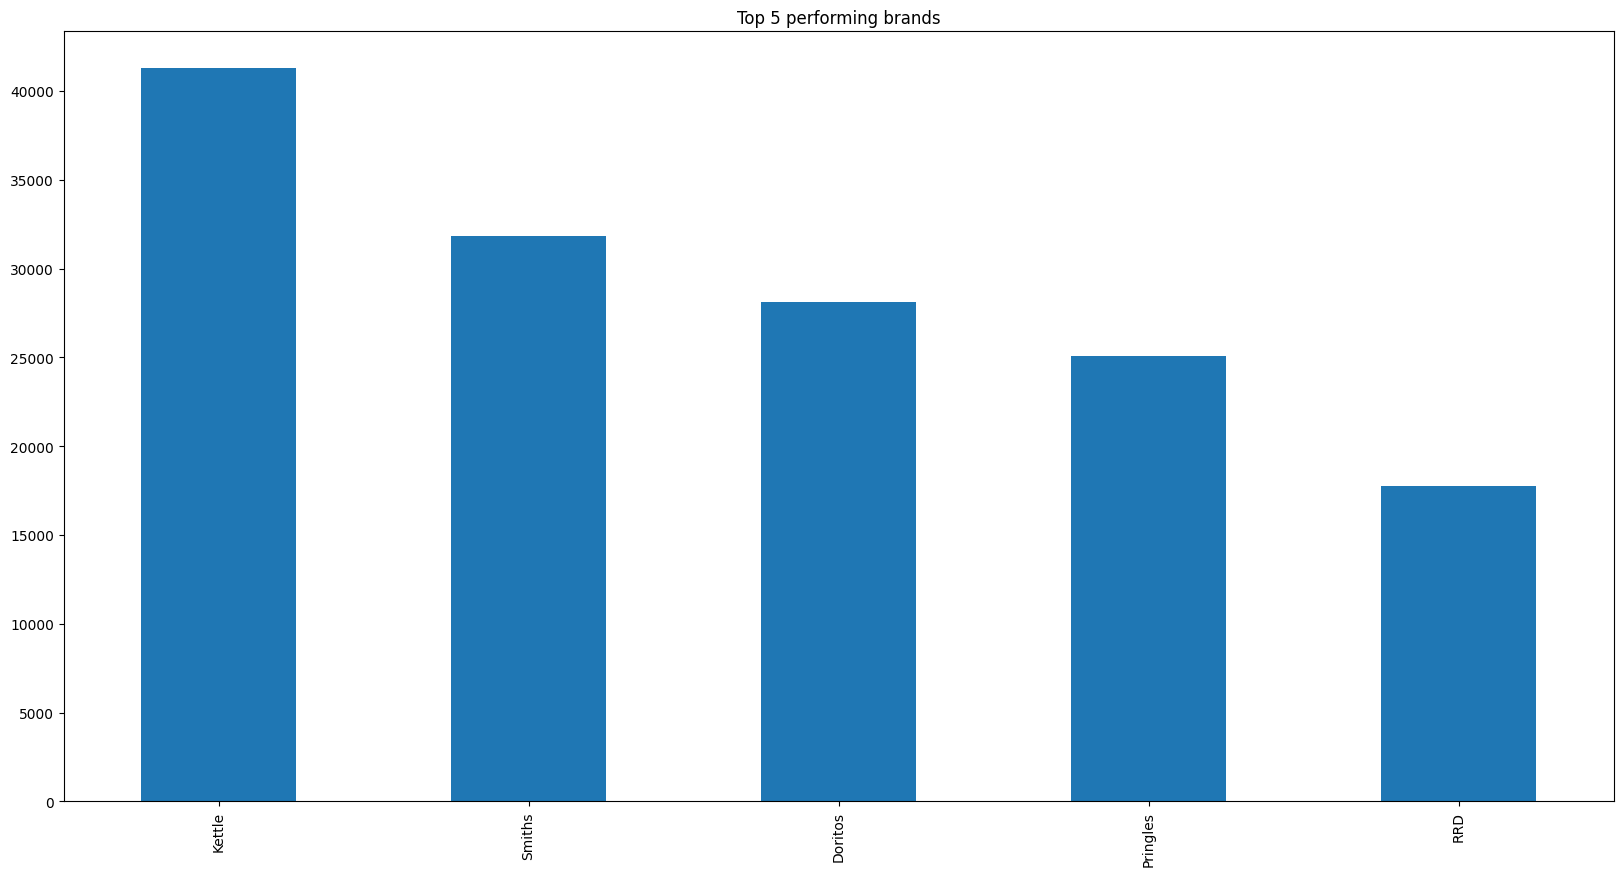

In [180]:
# Top 5 performing brands
merged2.BRAND_NAME.value_counts()[:5].plot(kind='bar',figsize=(20,10))
plt.title("Top 5 performing brands")
plt.show()

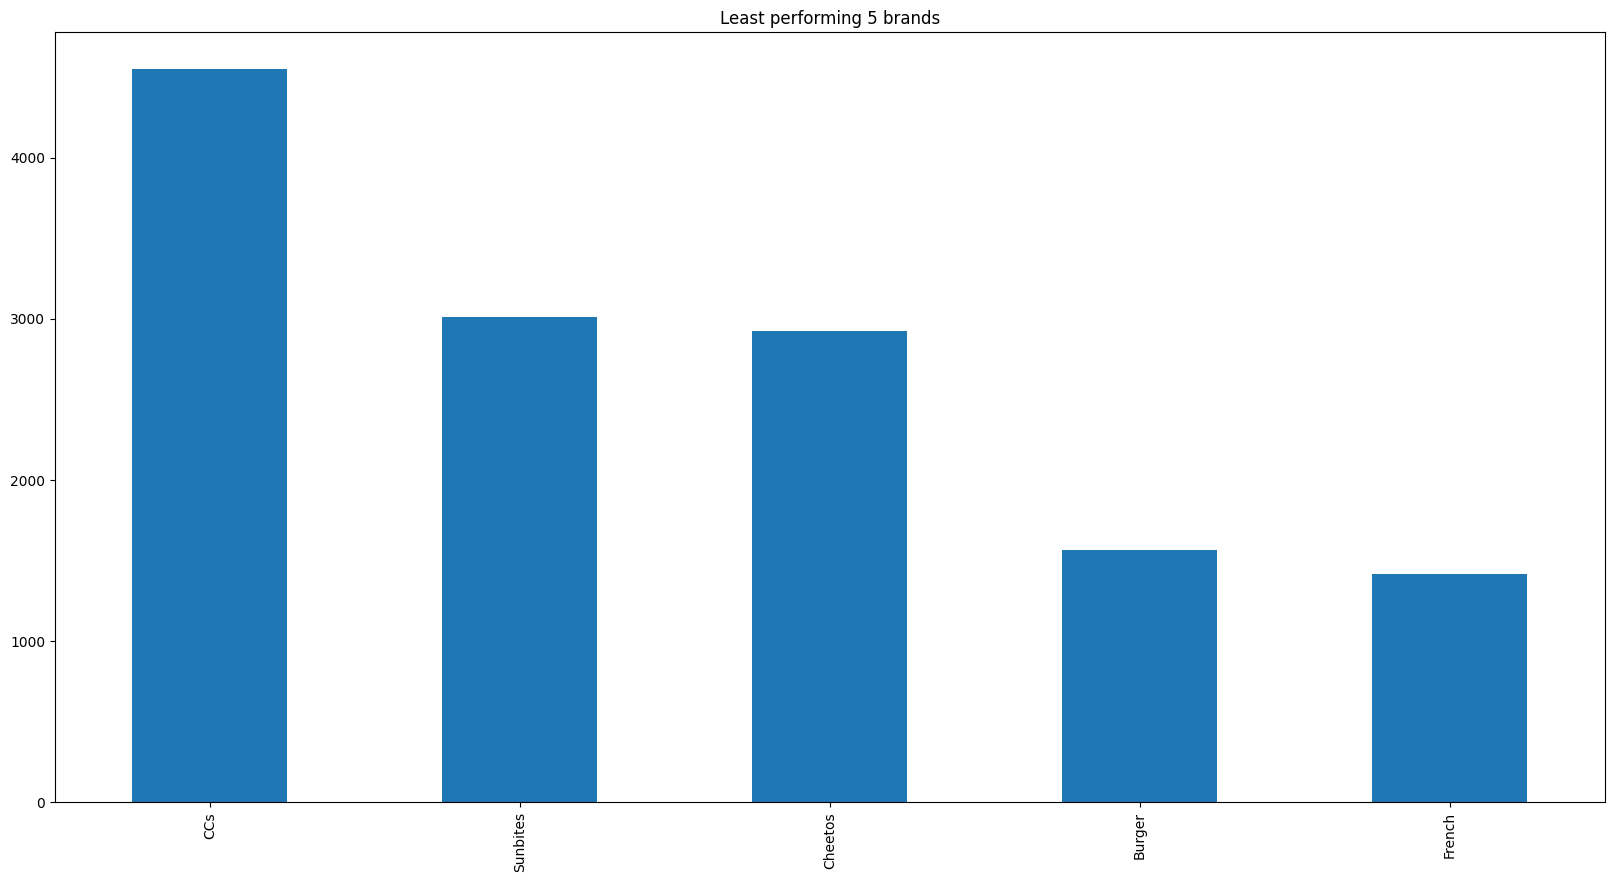

In [181]:
# Least performing 5 brands
merged2.BRAND_NAME.value_counts()[-5:].plot(kind='bar',figsize=(20,10))
plt.title("Least performing 5 brands")
plt.show()

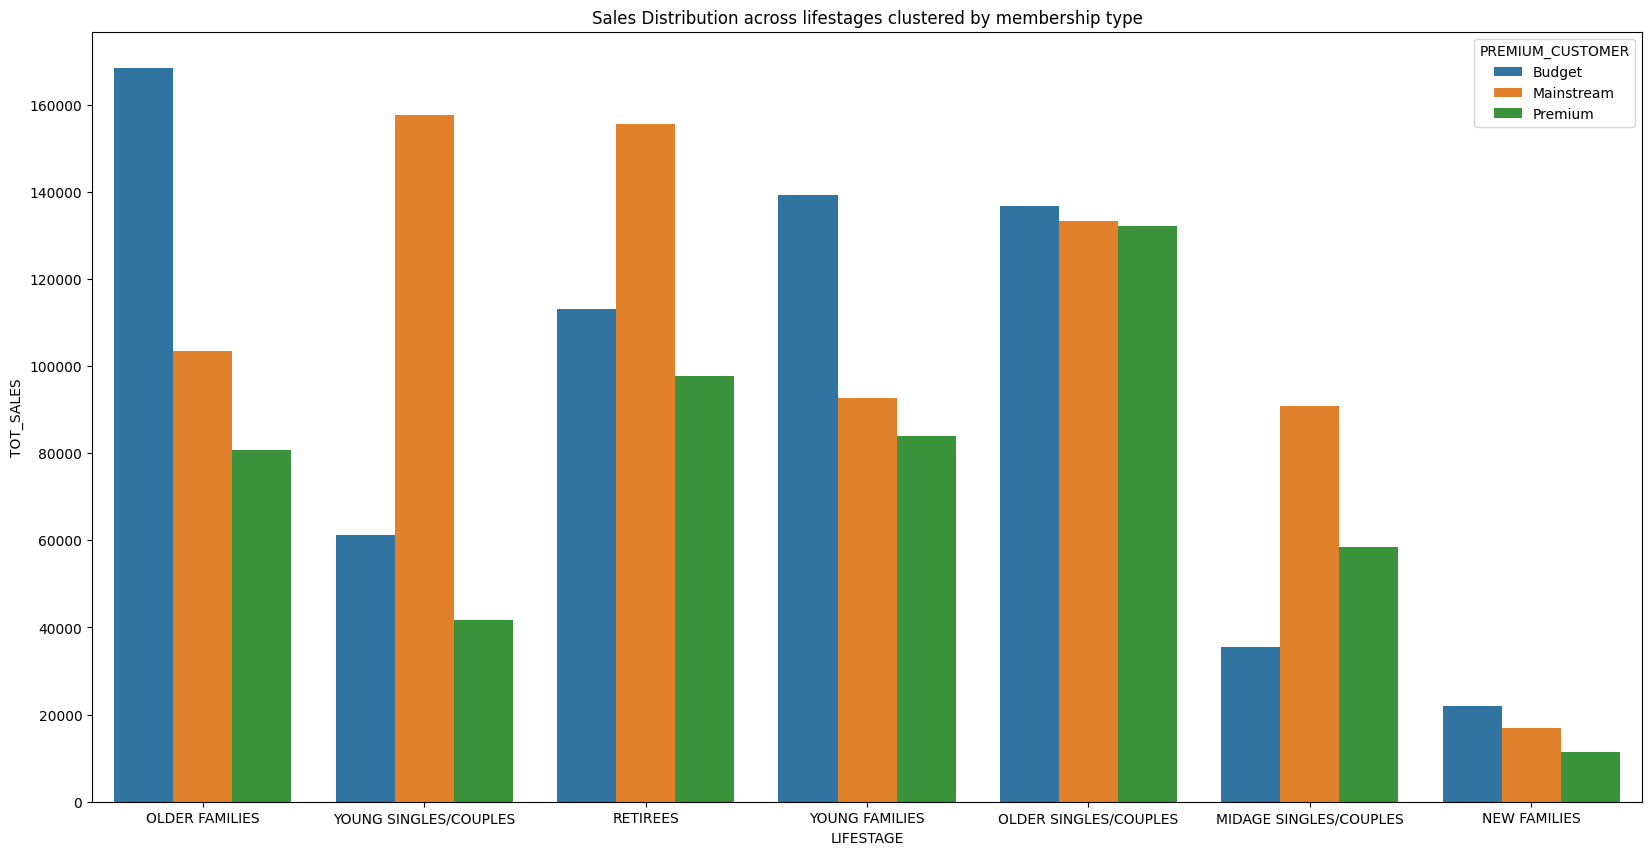

In [182]:
# Sales Distribution across lifestages clustered by membership type
totalsales_cust= merged2.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])[['TOT_SALES']].sum().reset_index()
totalsales_cust = totalsales_cust.sort_values('TOT_SALES', ascending=False)

plt.figure(figsize=(20,10))
sns.barplot(x='LIFESTAGE',y='TOT_SALES',hue='PREMIUM_CUSTOMER',data = totalsales_cust)
plt.title("Sales Distribution across lifestages clustered by membership type")
plt.show()

Sales are coming mainly from Mainstream due to performance of- young singles/couples, retirees and budget older families. New families offer the overall low in terms of sales in any membership.

Overall in terms of Brand performance by membership type, all membership types has an almost equall distribution in terms of sales per brand.

Kettle, Doritos ,Smiths, Pringles seems to be contributing to the most in Sales per brand wirh kettle leading heavily.

As shown earlier , Mainstream seems to be the most sought out membership type.

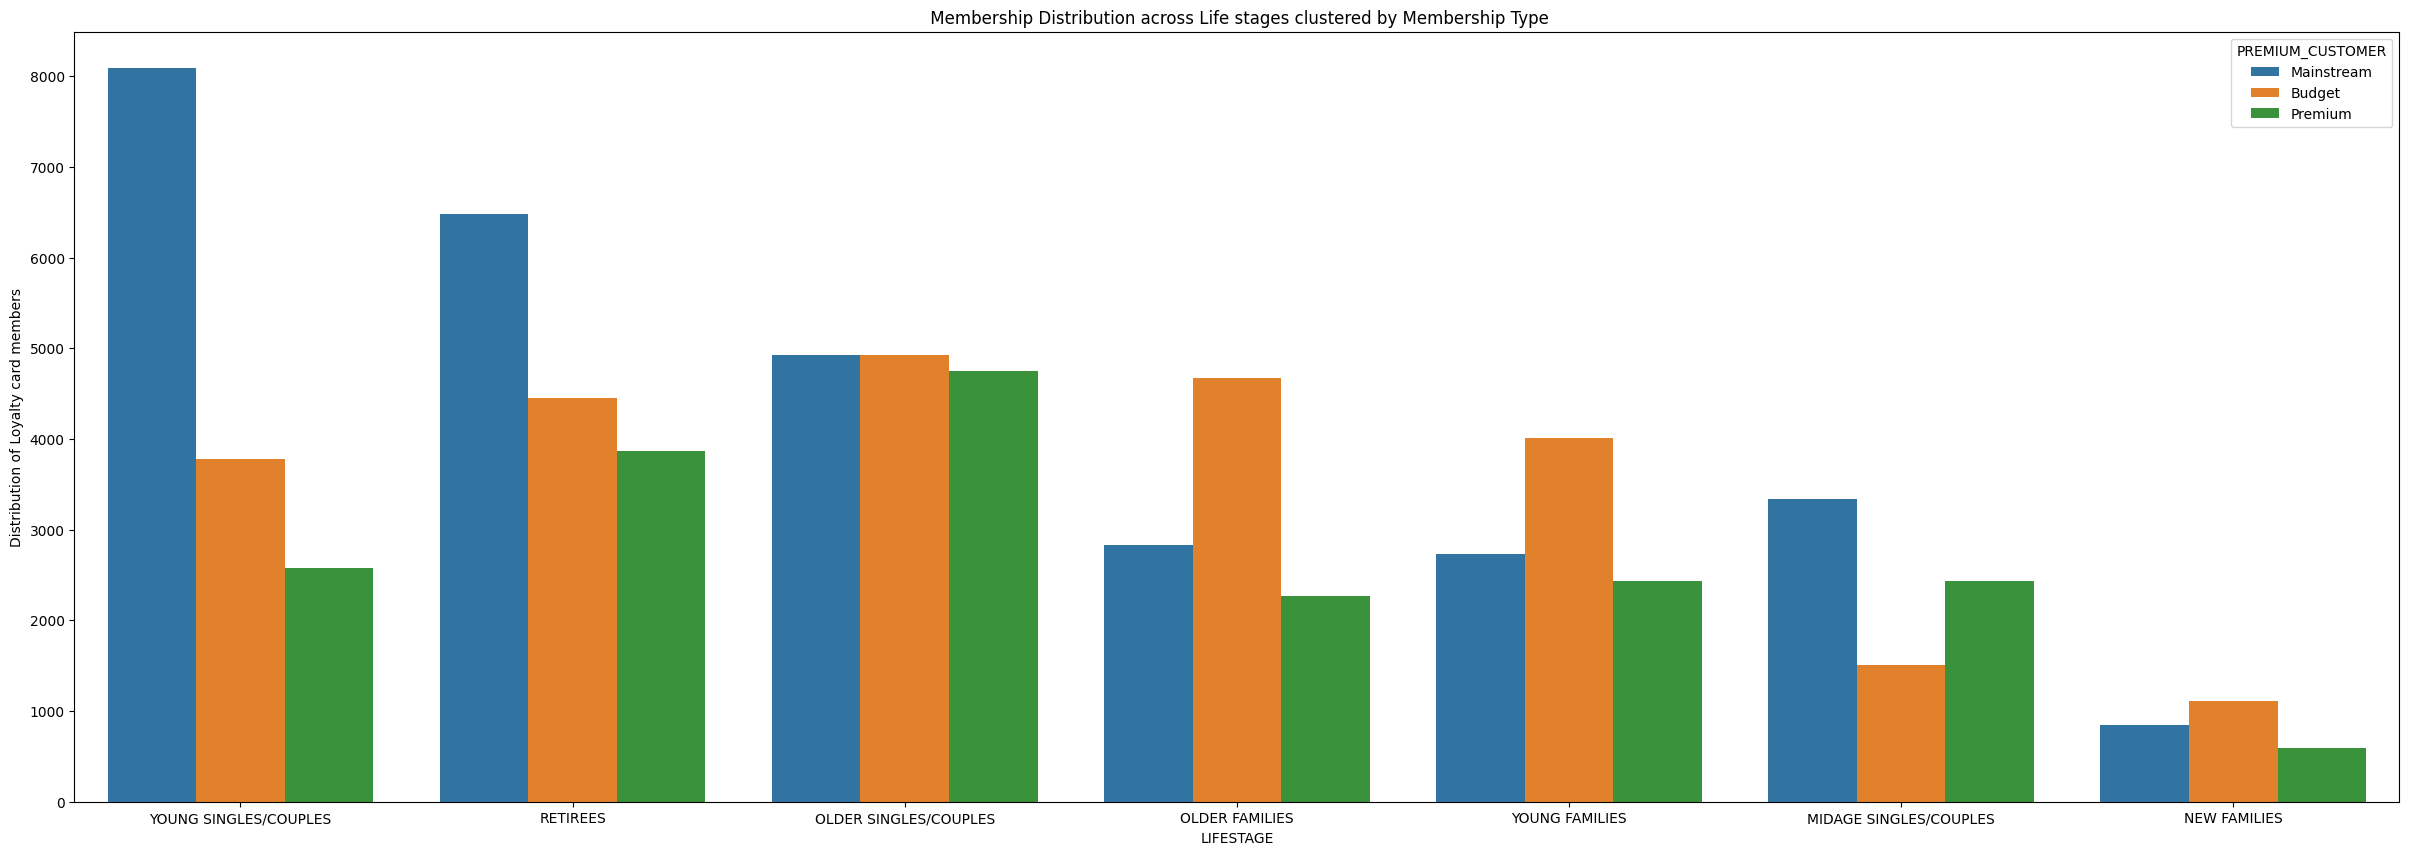

In [183]:
# Grouping royalty membership
grouped_royalty = merged2.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])[['LYLTY_CARD_NBR']].nunique().reset_index()
grouped_royalty = grouped_royalty.rename(columns={"LYLTY_CARD_NBR": "Loyalty_Card_Members"})
grouped_royalty=grouped_royalty.sort_values('Loyalty_Card_Members', ascending=False)
grouped_royalty

# Plotting the chart
plt.figure(figsize=(30,10))
sns.barplot(x='LIFESTAGE',y='Loyalty_Card_Members',hue='PREMIUM_CUSTOMER',data = grouped_royalty)
plt.title(" Membership Distribution across Life stages clustered by Membership Type")
plt.ylabel('Distribution of Loyalty card members')
plt.show()

Old Singles/Couples have a pretty evenly distribution across all membership types.

Older Families and Retirees tend to be more on budget than on premium memberships

Mainstream membership mostly is dominated by midage, young singles and couples, and retirees. This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.

<AxesSubplot: xlabel='DATE'>

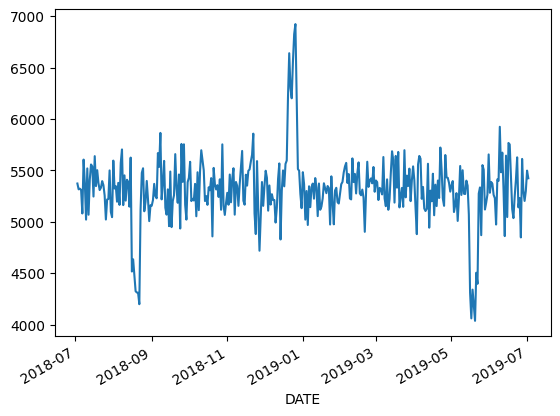

In [184]:
merged2.groupby('DATE').TOT_SALES.sum().plot(kind='line')

Sales peak during December. This could be because of Christmas.

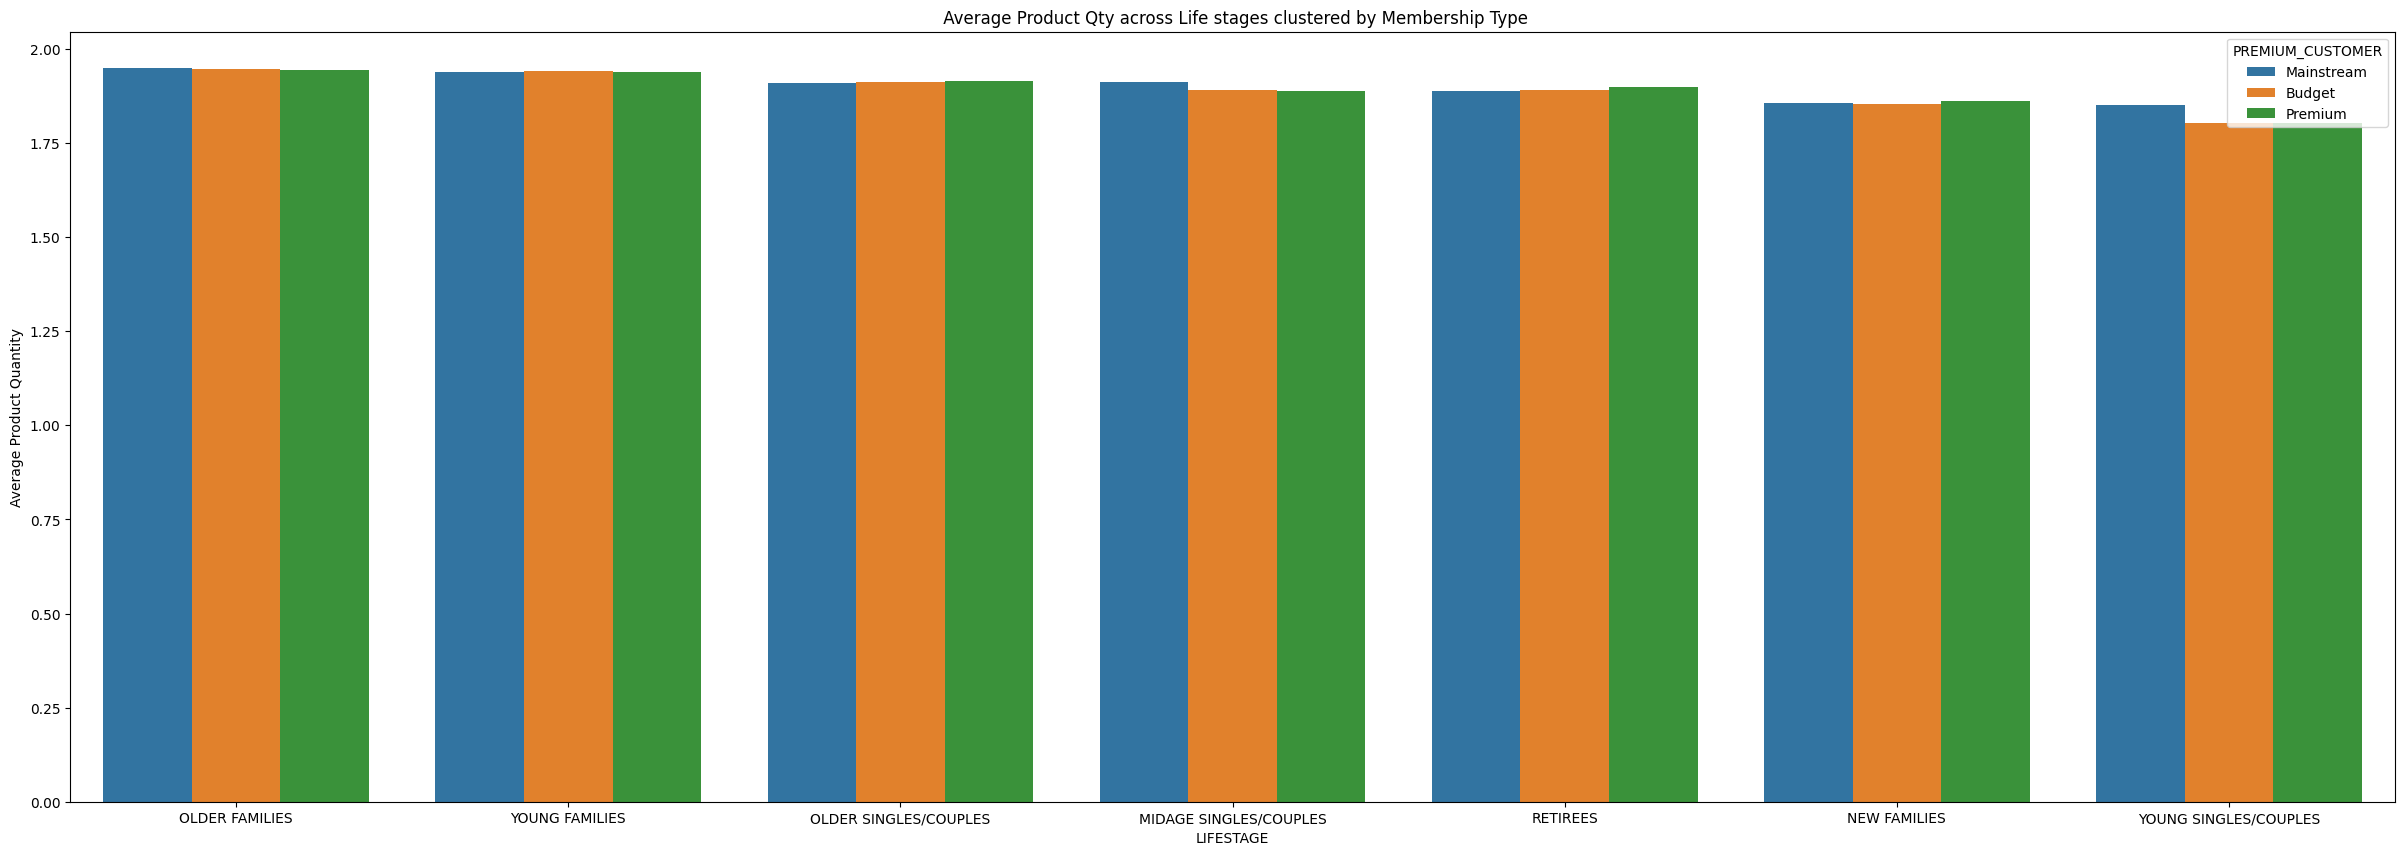

In [185]:
# Average Product Qty across Life stages clustered by Membership Type
# Grouping
avgunits_cust = merged2.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])[['PROD_QTY']].mean().reset_index()
avgunits_cust = avgunits_cust.rename(columns={"PROD_QTY": "Avg_Prod_Qty"})
avgunits_cust = avgunits_cust.sort_values('Avg_Prod_Qty', ascending=False)

# Plotting
plt.figure(figsize=(30,10))
sns.barplot(x='LIFESTAGE',y='Avg_Prod_Qty',hue='PREMIUM_CUSTOMER',data = avgunits_cust )
plt.title(" Average Product Qty across Life stages clustered by Membership Type")
plt.ylabel('Average Product Quantity')
plt.show()

The Older and the Younger families spend more on Product quantity than all the other categories. The remaining follows with almost similar trend but still less than the older and younger families.

In [187]:
# making a new dataframe avgprice_unit
avgprice_unit= merged2.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])[['TOT_SALES','PROD_QTY']].sum().reset_index()
# creating a new column with value of total sales divided by quantity
avgprice_unit['AVG_price/unit']=avgprice_unit['TOT_SALES']/avgprice_unit['PROD_QTY']
# sorting values
avgprice_unit= avgprice_unit.sort_values('AVG_price/unit', ascending=False)
# display
avgprice_unit

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,PROD_QTY,AVG_price/unit
19,YOUNG SINGLES/COUPLES,Mainstream,157621.60,38632,4.080079
1,MIDAGE SINGLES/COUPLES,Mainstream,90803.85,22699,4.000346
4,NEW FAMILIES,Mainstream,17013.90,4319,3.939315
3,NEW FAMILIES,Budget,21928.45,5571,3.936178
12,RETIREES,Budget,113147.80,28764,3.933660
14,RETIREES,Premium,97646.05,24884,3.924050
11,OLDER SINGLES/COUPLES,Premium,132263.15,33986,3.891695
5,NEW FAMILIES,Premium,11491.10,2957,3.886067
9,OLDER SINGLES/COUPLES,Budget,136769.80,35220,3.883299
13,RETIREES,Mainstream,155677.05,40518,3.842170


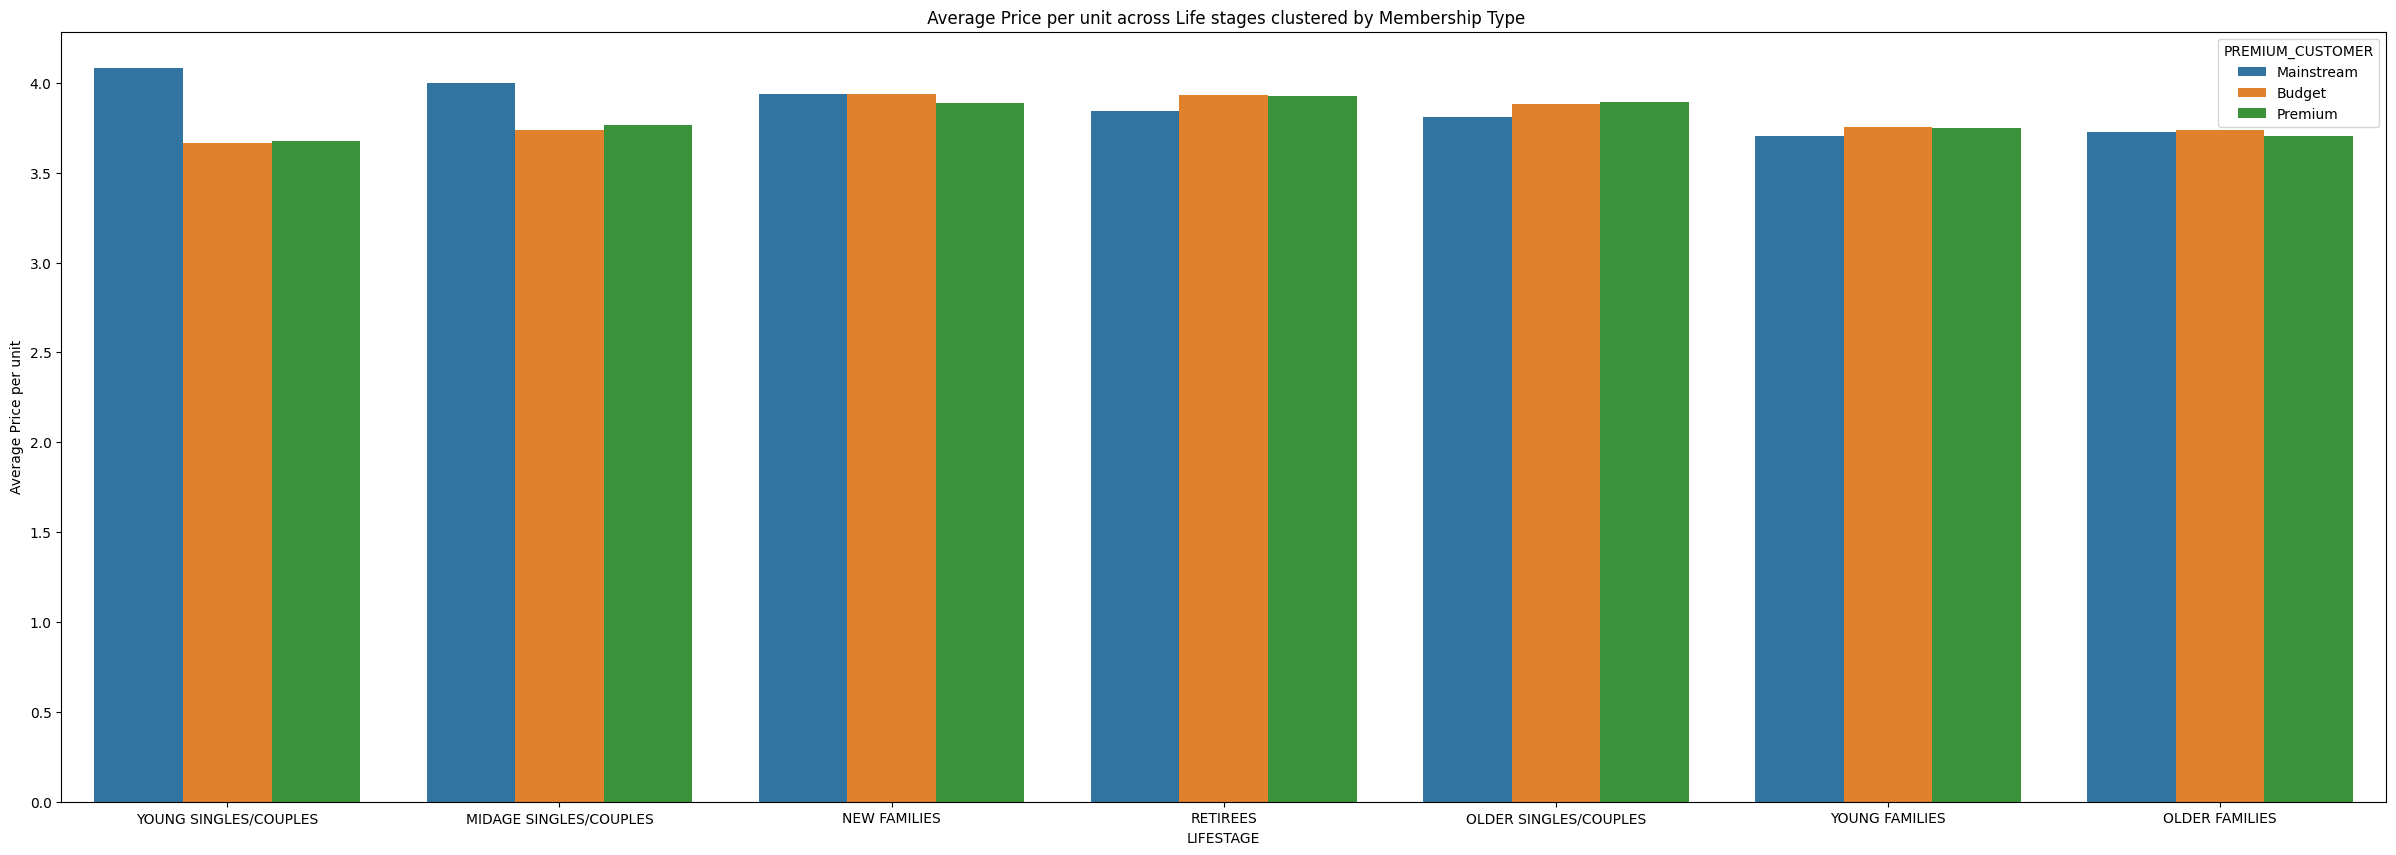

In [188]:
# plotting the visualization
plt.figure(figsize=(30,10))
sns.barplot(x='LIFESTAGE',y='AVG_price/unit',hue='PREMIUM_CUSTOMER',data = avgprice_unit )
plt.title(" Average Price per unit across Life stages clustered by Membership Type")
plt.ylabel('Average Price per unit')
plt.show()

Midage single couples and Young single couples spend more on average price per unit bought especially in Mainstream membership.There is a clear trend here based on previous visualizations as well, that the younger and mid age couples are less likely to be taking premium memberships on purchasing products. Their consumption pattern could be mostly for entertainment rather than healthy snacks compared to the others.

Except for these two categories, remaining lifestyle trends almost remain the same across various memberships. How significantly large is the group from others?

Next step is to do a t-test to verify if there is any statistical significance to the unit price for mainstream, young and mid-age singles and couples [ARE / ARE NOT] significantly higher than that of budget or premium, young and midage singles and couples.

In [189]:
merged['PricePerUnit'] = merged['TOT_SALES'] / merged['PROD_QTY']

In [190]:
# creating 2 samples
# the first one is the group that is mainstream
# the second one is the group that is not mainstream
sample1 = merged[(merged['LIFESTAGE'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"]))  & (merged['PREMIUM_CUSTOMER'] == 'Mainstream')]
sample2 = merged[(merged['LIFESTAGE'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"]))  & (merged['PREMIUM_CUSTOMER'] != 'Mainstream')]

In [191]:
# checking the 1st sample
sample1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,BRAND_NAME,WEIGHT,PROD_DESC,LIFESTAGE,PREMIUM_CUSTOMER,PricePerUnit
5021,2019-05-20,3,3159,1759,77,2,8.8,Doritos,170,Corn Chips Nacho Cheese,MIDAGE SINGLES/COUPLES,Mainstream,4.4
5022,2019-03-25,3,3159,1757,36,2,10.8,Kettle,175,Chilli,MIDAGE SINGLES/COUPLES,Mainstream,5.4
5023,2019-05-12,3,3159,1758,81,2,7.4,Pringles,134,Original Crisps,MIDAGE SINGLES/COUPLES,Mainstream,3.7
5024,2019-05-18,3,3294,2370,51,2,8.8,Doritos,170,Mexicana,MIDAGE SINGLES/COUPLES,Mainstream,4.4
5025,2019-04-24,3,3294,2369,114,2,9.2,Kettle,150,Sensations Siracha Lime,MIDAGE SINGLES/COUPLES,Mainstream,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258551,2018-12-03,272,272377,270186,75,2,7.6,Cobs,110,Popd Sea Salt Chips,YOUNG SINGLES/COUPLES,Mainstream,3.8
258552,2018-07-29,272,272389,270200,114,2,9.2,Kettle,150,Sensations Siracha Lime,YOUNG SINGLES/COUPLES,Mainstream,4.6
258553,2018-11-12,272,272389,270201,26,2,7.4,Pringles,134,Sweet&Spcy BBQ,YOUNG SINGLES/COUPLES,Mainstream,3.7
258554,2019-04-03,272,272389,270202,62,2,7.4,Pringles,134,Mystery Flavour,YOUNG SINGLES/COUPLES,Mainstream,3.7


In [192]:
# checking the 2nd sample
sample2

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,BRAND_NAME,WEIGHT,PROD_DESC,LIFESTAGE,PREMIUM_CUSTOMER,PricePerUnit
0,2018-10-19,1,1000,1,5,2,6.0,Natural,175,Chip Compny,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-16,1,1307,348,66,3,6.3,CCs,175,Nacho Cheese,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2018-11-12,1,1307,346,96,2,3.8,WW,160,Original Stacked Chips,MIDAGE SINGLES/COUPLES,Budget,1.90
3,2019-03-11,1,1307,347,54,1,2.1,CCs,175,Original,MIDAGE SINGLES/COUPLES,Budget,2.10
4,2019-05-22,1,1343,383,61,2,2.9,Smiths,170,Crinkle Cut Chips Chicken,MIDAGE SINGLES/COUPLES,Budget,1.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-11,272,272319,270088,89,2,10.8,Kettle,175,Sweet Chilli And Sour Cream,YOUNG SINGLES/COUPLES,Premium,5.40
264832,2018-08-15,272,272358,270154,74,1,4.4,Tostitos,175,Splash Of Lime,YOUNG SINGLES/COUPLES,Premium,4.40
264833,2018-11-08,272,272379,270187,51,2,8.8,Doritos,170,Mexicana,YOUNG SINGLES/COUPLES,Premium,4.40
264834,2018-12-29,272,272379,270188,42,2,7.8,Doritos,150,Corn Chip Mexican Jalapeno,YOUNG SINGLES/COUPLES,Premium,3.90


The sample size is unequal. Lets test for normality

(array([1234.,  699., 2507., 4242., 8409., 4997., 3692., 4165., 2358.,
         425.]),
 array([1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5]),
 <BarContainer object of 10 artists>)

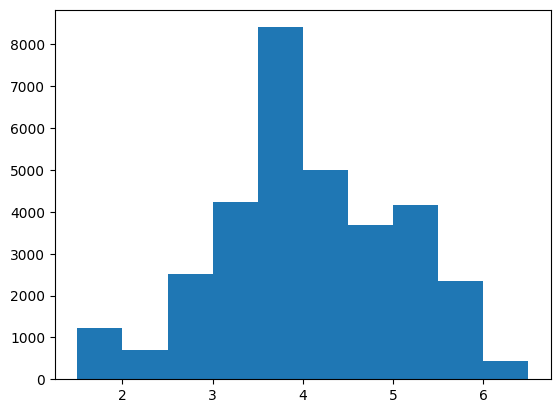

In [193]:
plt.hist(sample1.PricePerUnit)

(array([1435., 2122., 2938., 5751., 6169., 3391., 2474., 2687., 1476.,
         316.]),
 array([1.35 , 1.865, 2.38 , 2.895, 3.41 , 3.925, 4.44 , 4.955, 5.47 ,
        5.985, 6.5  ]),
 <BarContainer object of 10 artists>)

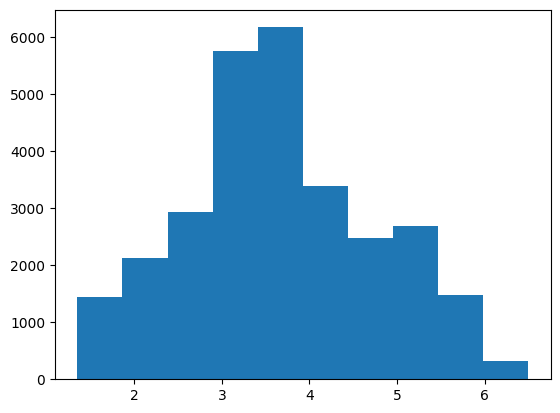

In [194]:
plt.hist(sample2.PricePerUnit)

Both of them are normalized.

Considering they are independent samples, for unequal sample sizes and normalized data, I will first test them for variance ; F test and Levenes test in this case, followed by a t-test depending on the result ( pooled variance /seperate variance)

In [196]:
from scipy import stats
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    # calculate F test statistic
    f = np.var(x, ddof=1)/np.var(y, ddof=1)  
    # define degrees of freedom numerator
    dfn = x.size-1  
    # define degrees of freedom denominator
    dfd = y.size-1  
    # find p-value of F test statistic
    p = 1-stats.f.cdf(f, dfn, dfd)  
    return f, p

# perform F-test
f_test(sample1.PricePerUnit, sample2.PricePerUnit)

(0.8427982615066106, 1.0)

P value is extending to 1 ; F-test is not really ideal when our sample sizes are largely unequal which might lead to false assumptions.

In [200]:
#testing for equality of variances for unequal sample sizes using levenes test
from scipy.stats import levene
a = sample1.PricePerUnit.values.tolist()
b = sample2.PricePerUnit.values.tolist()
stat, p = levene(a,b)
print('t = %.3f, p = %.3f ' % (stat, p))

t = 212.157, p = 0.000 


With a p value less than 0.05 we can reject the null hypothesis; hence we prove there is no equality in variance between the 2 samples.

In [201]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(sample1.PricePerUnit, sample2.PricePerUnit,equal_var=True)
print('t = %.3f, p = %.3f ' % (stat, p))

t = 40.834, p = 0.000 


Since we can reject the null hypothesis yet again; the unit price for mainstream,young and mid-age singles and couples is significantly higher than that of budget or premium, young and midage singles and couples.

<AxesSubplot: >

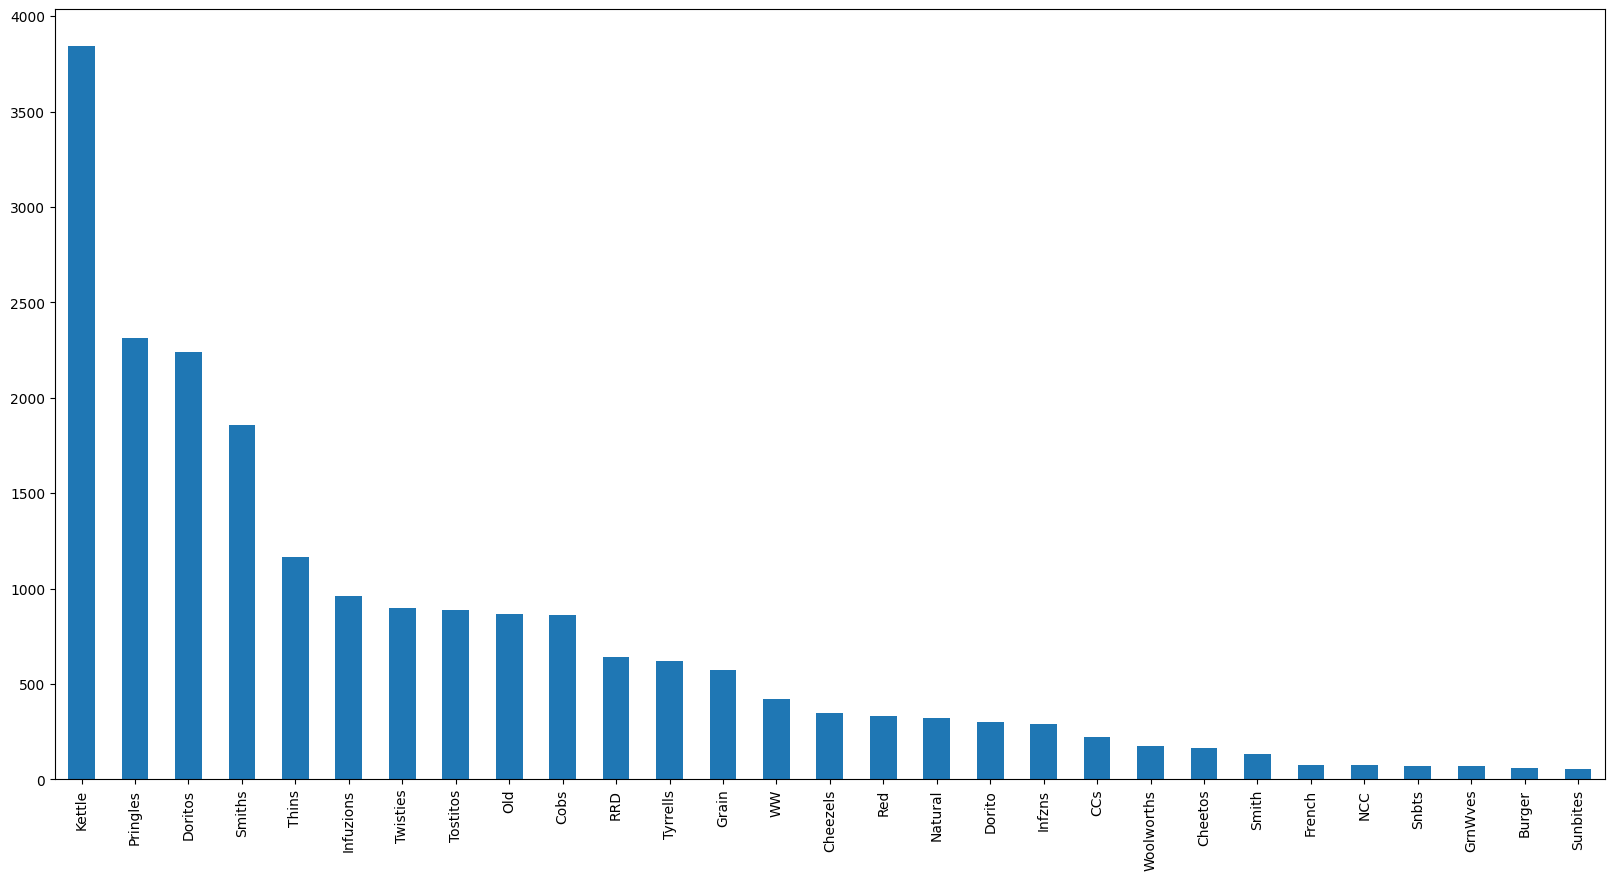

In [206]:
# making a visualization to see the result of Analysis1
Analysis1 = merged[(merged['LIFESTAGE'].isin(["YOUNG SINGLES/COUPLES"]))  & (merged['PREMIUM_CUSTOMER'] == 'Mainstream')]
Analysis1
Analysis1.BRAND_NAME.value_counts().plot(kind='bar',figsize=(20,10))

Looks like kettle is the most preferred brand among the Young Singles/Couples of Mainstream membership. Next, let's also find out if our target segment tends to buy larger packs of chips.

<AxesSubplot: >

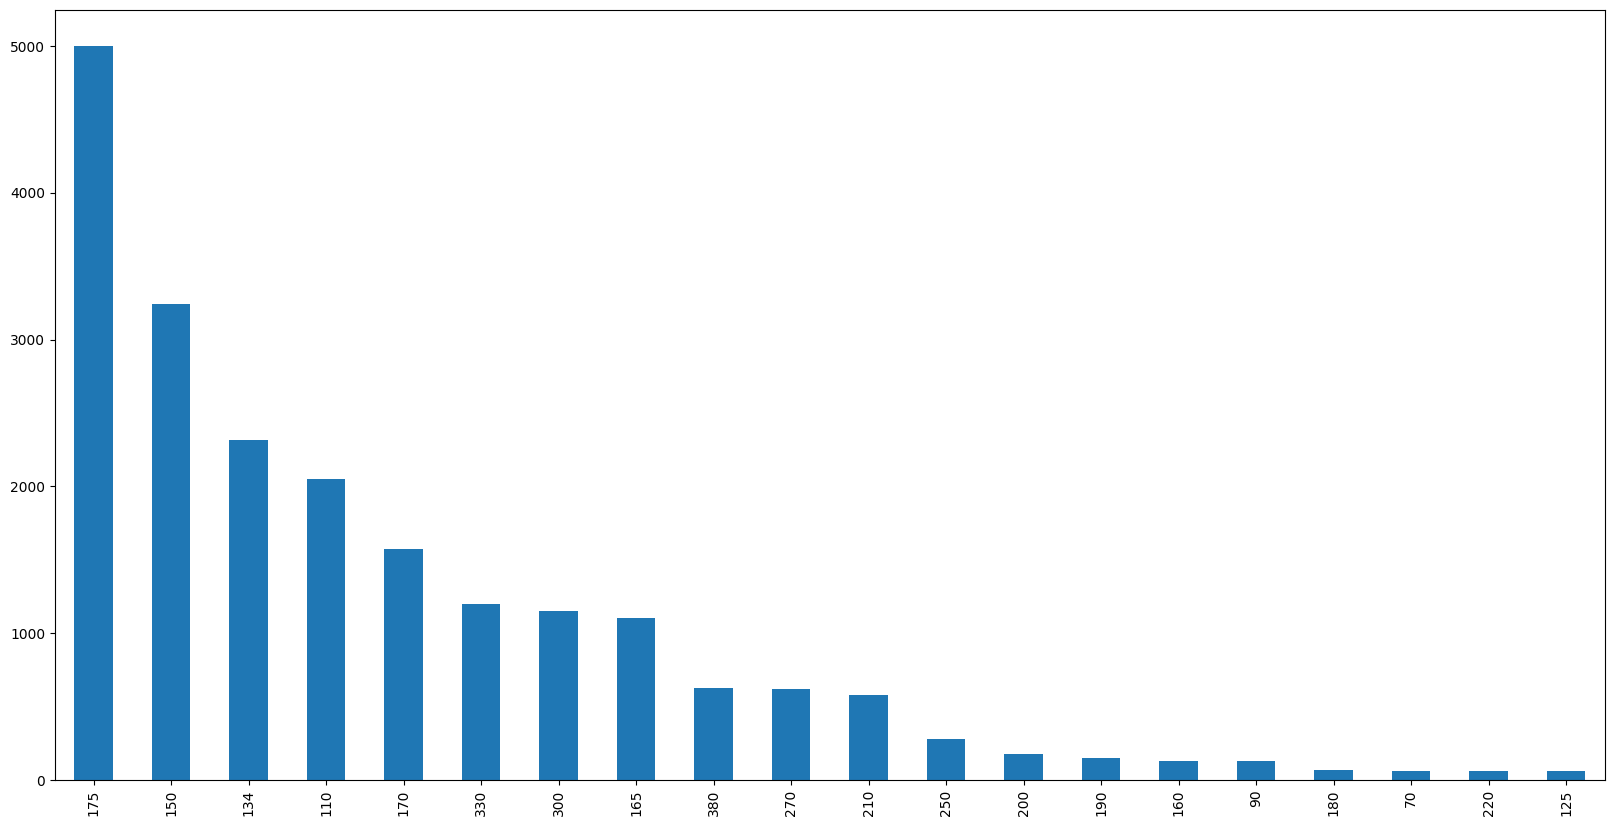

In [208]:
Analysis1.WEIGHT.value_counts().plot(kind='bar',figsize=(20,10))

Based on previous analysis as well, looks like Young/Single Couples are the major contributors to the packsizes 175gms in top followed 150,134,170 and 165 in order as the top 5 performers.

#### Conclusions

Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream- retirees shoppers.

High spend in chips for mainstream young singles/couples and retirees is due to there being more of them than other buyers. Mainstream, midage and young singles and couples are also more likely to pay more per packet of chips. This might be an indicative of impulse buying behaviour.

We’ve also found that Mainstream young singles and couples are 23% more likely to purchase Kettle and Pringles chips compared to the rest of the population. The Category Manager may want to increase the category’s performance by off-locating some Kettle and smaller packs of Pringles in discretionary space near segmentswhere young singles and couples frequent more often to increase visibilty and impulse behaviour.

Quantium can help the Category Manager with recommendations of where these segments are and further help them with measuring the impact of the changed placement.